# Unsupervised Learning

Unsupervised Learning is the machine learning task of being able to infer certain characteristics that describe the input data when it is **unlabeled**. 

Since the examples given are unlabeled, there is no way to evaluate the accuracy of the model.

# $K$-Means Clustering

$K$-Means Clustering is a popular method used for unsupervised learning. The main idea behind $k$-means is to split your input data into $k$ clusters where $k$ is user specified, that is, by you! If you don't have prior, there is no rule of thumb in choosing $k$. Some people train the clustering algorithm for various choices of $k$ and choose the value that corresponds to the highest accuracy.

The functions below are a simple implmentation of Lloyd's algorithm. 

"def cluster_points": Given the input data and current centers, this function calculates the distance $\sqrt{(x_i - \mu_i)^2}$ between each input $x_i$ and each mean $\mu_i$ and assigns the input $x_i$ to the cluster belonging to the closest $\mu_i$.

"def reevaluate_centers": Given the current means and clusters of input data, this function re-evaluates the means by computing the mean of the current clusters.

"def has_converged": This function gives a *stopping criterion* for the $k$-means algorithm

"def find_centers": This function incorporates all the previous function to find the "best" $k$-means partition. **Note**: In this context, the best clustering depends on the starting means. In some cases, a different starting point can lead to a different clustering. Thus, we say that the $k$-means algorithm converges to a *local solution*.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cluster_points(X, mu):
    clusters  = {}
    for x in X:
        bestmukey = min([(i[0], np.linalg.norm(x-mu[i[0]])) \
                    for i in enumerate(mu)], key=lambda t:t[1])[0]
        try:
            clusters[bestmukey].append(x)
        except KeyError:
            clusters[bestmukey] = [x]
    return clusters

def reevaluate_centers(mu, clusters):
    # require mu for cluster key
    newmu = []
    keys = sorted(clusters.keys())
    for k in keys:
        newmu.append(np.mean(clusters[k], axis = 0))
    return newmu

def has_converged(mu, oldmu):
    return (set([tuple(a) for a in mu]) == set([tuple(a) for a in oldmu]))


def find_centers(X, K):
    # Initialize to K random centers
    oldmu = random.sample(X, K)
    mu = random.sample(X, K)
    while not has_converged(mu, oldmu):
        oldmu = mu
        # Assign all points in X to clusters
        clusters = cluster_points(X, mu)
        # Reevaluate centers
        mu = reevaluate_centers(oldmu, clusters)
    return(mu, clusters)

First, let's generate some random (x,y)-pairs that should clearly be separated into three clusters.

(198, 2)


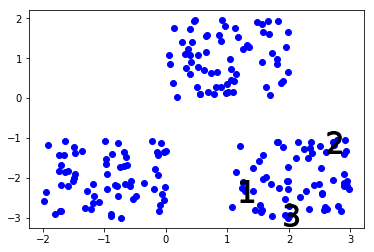

In [3]:
import random
 
K = 3    
def init_board(N):
    #X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    x1 = np.array([(random.uniform(-1, 1)+1, random.uniform(-1, 1)+1) for i in range(N/3)])
    x2 = np.array([(random.uniform(-1, 1)-1, random.uniform(-1, 1)-2) for i in range(N/3)])
    x3 = np.array([(random.uniform(-1, 1)+2, random.uniform(-1, 1)-2) for i in range(N/3)])
    X = np.concatenate((x1, x2, x3), axis = 0)
    print(X.shape)
    return X

# Separate roughly 200 points into three clusters
X = init_board(200)
mu = random.sample(X, K)


# Plot the synthetically generated data
plt.plot(X[:,0], X[:,1],'bo')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='k', \
         markersize=22, marker=r'$1$')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='k', \
         markersize=22, marker=r'$2$')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='k', \
         markersize=22, marker=r'$3$')

plt.show()
plt.close()

Now let's see what happens after just one iteration of Lloyd's Algorithm:

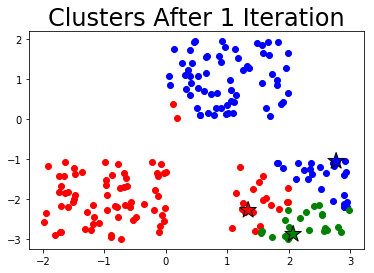

In [4]:
# Iteration 1:
clusters = cluster_points(X, mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 1 Iteration', fontsize = 24)
plt.show()

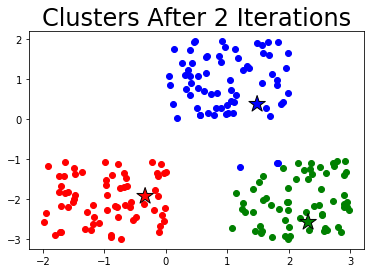

In [5]:
# Iteration 2:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X,mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 2 Iterations', fontsize = 24)
plt.show()

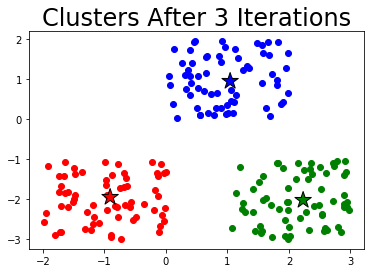

In [6]:
# Iteration 3:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X,mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 3 Iterations', fontsize = 24)
plt.show()

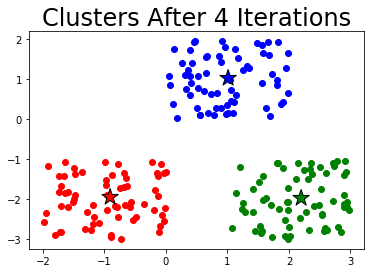

In [7]:
# Iteration 4:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X,mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 4 Iterations', fontsize = 24)
plt.show()

In [8]:
def init_board_gauss(N, k, rs):
    if rs:
        rng = np.random.RandomState(rs)
        
    n = float(N)/k
    X = []
    for i in range(k):
        c = (rng.uniform(-1, 1), rng.uniform(-1, 1))
        s = rng.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([rng.normal(c[0], s), rng.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

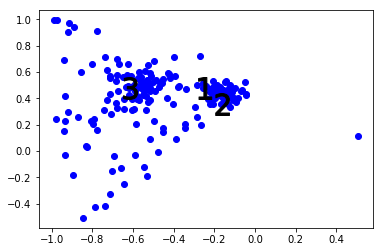

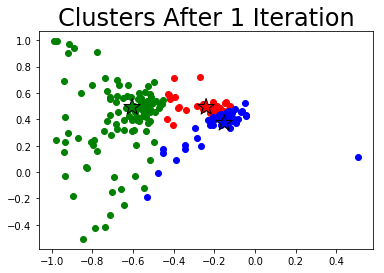

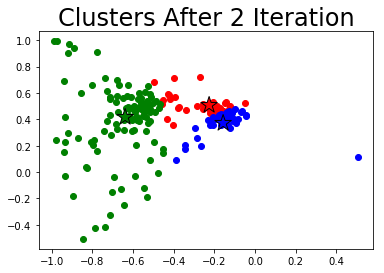

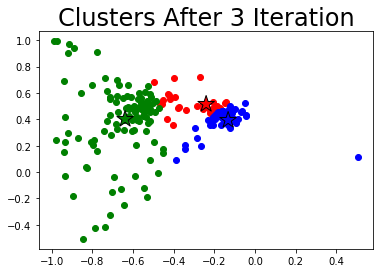

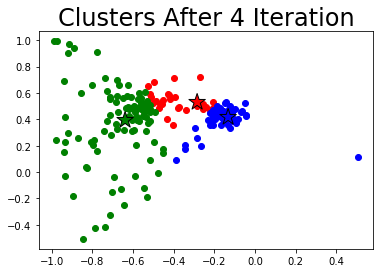

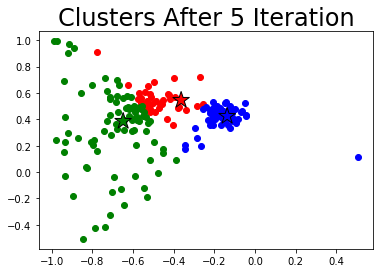

In [10]:
X = init_board_gauss(200,3, 1)
mu = random.sample(X, K)
plt.plot(X[:,0], X[:,1],'bo')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='k', \
         markersize=22, marker=r'$1$')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='k', \
         markersize=22, marker=r'$2$')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='k', \
         markersize=22, marker=r'$3$')

plt.show()

# Iteration 1:
clusters = cluster_points(X, mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 1 Iteration', fontsize = 24)
plt.show()

# Iteration 2:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X, mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 2 Iteration', fontsize = 24)
plt.show()

# Iteration 3:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X, mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 3 Iteration', fontsize = 24)
plt.show()

# Iteration 4:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X, mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 4 Iteration', fontsize = 24)
plt.show()

# Iteration 5:
mu = reevaluate_centers(mu, clusters)
clusters = cluster_points(X, mu)

plt.plot(np.array(clusters[0])[:,0], np.array(clusters[0])[:,1],'ro')
plt.plot(np.array(clusters[1])[:,0], np.array(clusters[1])[:,1],'bo')
plt.plot(np.array(clusters[2])[:,0], np.array(clusters[2])[:,1],'go')

plt.plot(np.array(mu)[0,0], np.array(mu)[0,1],c='r', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[1,0], np.array(mu)[1,1],c='b', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.plot(np.array(mu)[2,0], np.array(mu)[2,1],c='g', \
         marker=r'$\star$',markersize=22, markeredgecolor='k')
plt.title('Clusters After 5 Iteration', fontsize = 24)
plt.show()